In [308]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [309]:
bigdata_path = './clean_data/bigdataset.csv'

In [310]:
data = pd.read_csv(bigdata_path)
data.head()

,Hãng xe,Dòng xe,Năm đăng ký,Số Km đã đi,Tình trạng,Loại xe,Dung tích xe,Xuất xứ,Chính sách bảo hành,Giá
0,Honda,Wave,1996,20000,Đã sử dụng,Xe số,100 - 175 cc,Đang cập nhật,Bảo hành hãng,1500000.0
1,Piaggio,Liberty,2014,3000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật,Bảo hành hãng,9500000.0
2,Honda,Cub,1992,70000,Đã sử dụng,Xe số,50 - 100 cc,Đang cập nhật,Bảo hành hãng,12000000.0
3,Yamaha,Exciter,2014,29000,Đã sử dụng,Xe số,100 - 175 cc,Đang cập nhật,Bảo hành hãng,9300000.0
4,Yamaha,Nouvo,2011,55555,Đã sử dụng,Tay ga,50 - 100 cc,Đang cập nhật,Bảo hành hãng,6200000.0


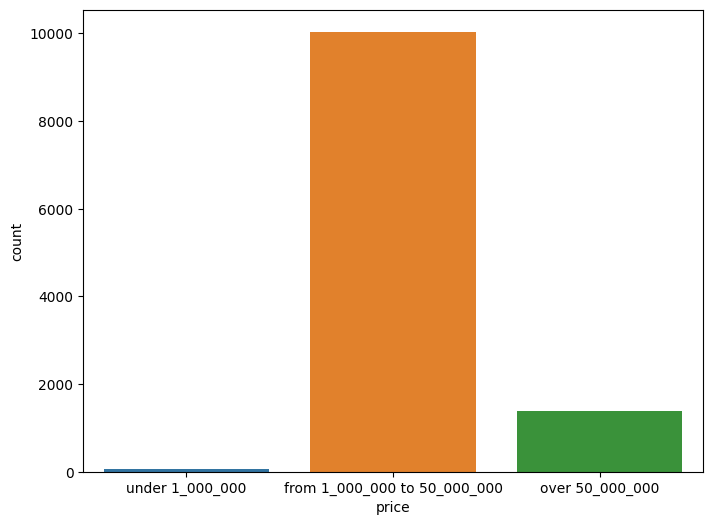

In [311]:
under_1_000_000 =  data[data['Giá'] <= 1_000_000]['Giá'].count()
from_1_000_000_to_50_000_000 = data[(data['Giá'] > 1_000_000) & (data['Giá'] <= 50_000_000)]['Giá'].count()
over_50_000_000 = data[data['Giá'] > 50_000_000]['Giá'].count()
price = pd.DataFrame({'price': ['under 1_000_000', 'from 1_000_000 to 50_000_000', 'over 50_000_000'],
                      'count': [under_1_000_000, from_1_000_000_to_50_000_000, over_50_000_000]})
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=price, x='price', y='count', ax=ax)
plt.show()

In [312]:
data = data[(data['Giá'] < 50000000) & (data['Giá'] > 1000000)]

<h2>Dữ liệu chữ</h2>

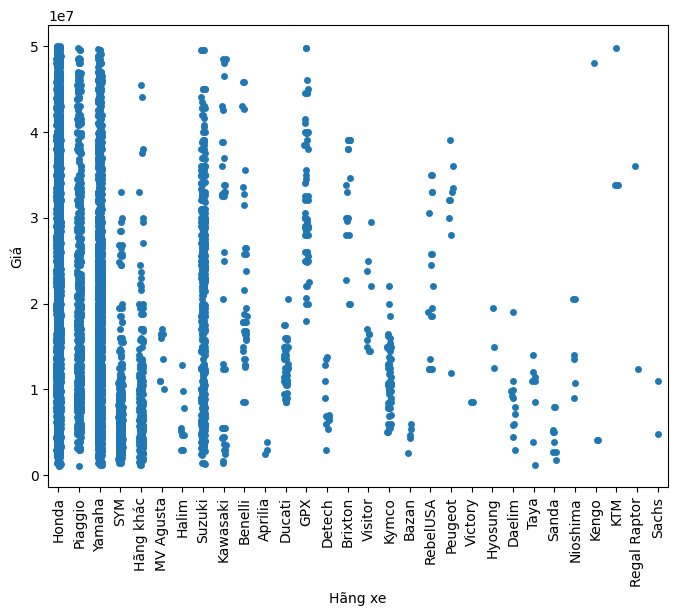

In [313]:
fig, ax = plt.subplots(figsize=(8,6))
sns.stripplot(data=data, x='Hãng xe', y='Giá', ax=ax)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

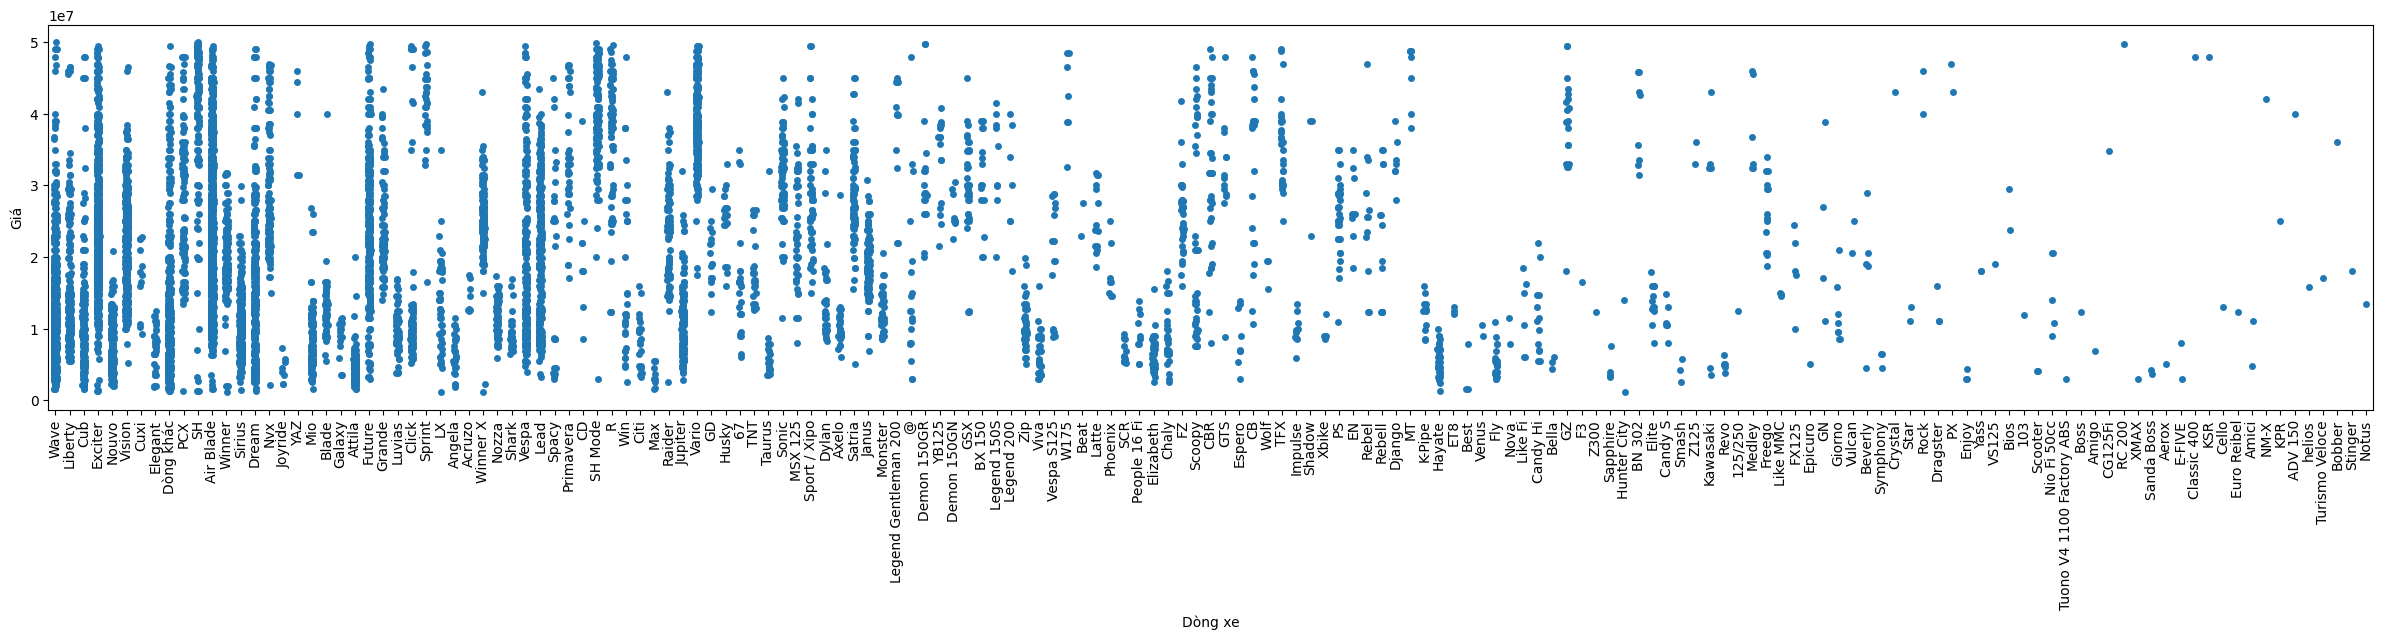

In [314]:
fig, ax = plt.subplots(figsize=(30,5))
sns.stripplot(data=data, x='Dòng xe', y='Giá', ax=ax)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [315]:
data['Tình trạng'].unique()

array(['Đã sử dụng'], dtype=object)

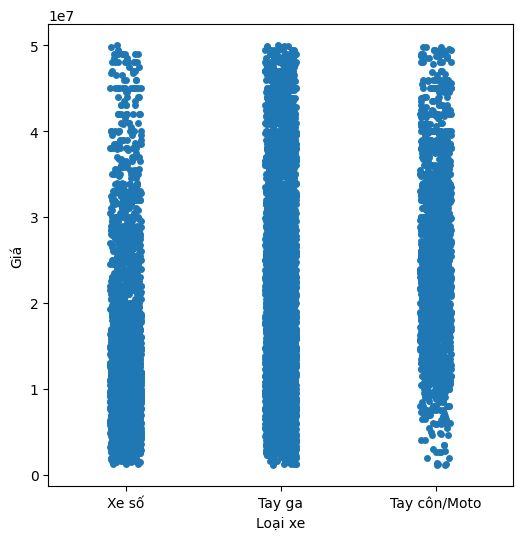

In [316]:
fig, ax = plt.subplots(figsize=(6,6))
sns.stripplot(data=data, x='Loại xe', y='Giá', ax=ax)
plt.show()

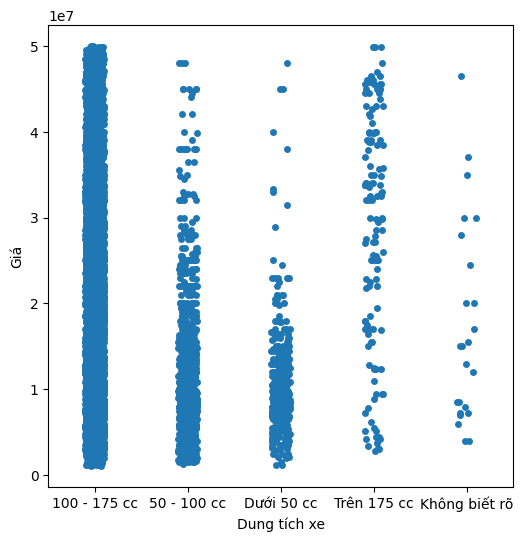

In [317]:
fig, ax = plt.subplots(figsize=(6,6))
sns.stripplot(data=data, x='Dung tích xe', y='Giá', ax=ax)
plt.show()

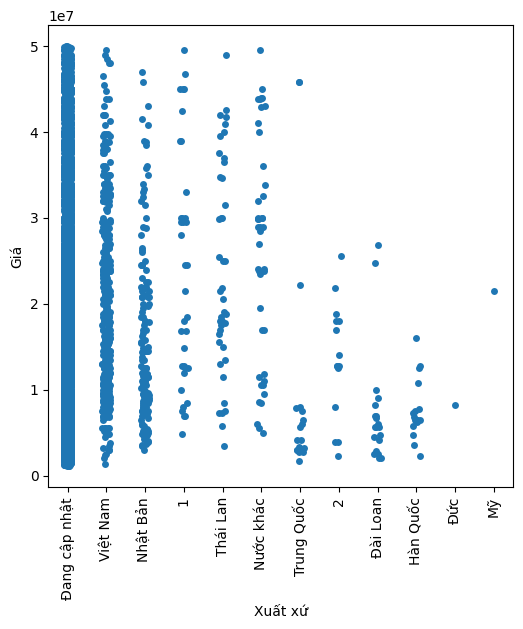

In [318]:
fig, ax = plt.subplots(figsize=(6,6))
sns.stripplot(data=data, x='Xuất xứ', y='Giá', ax=ax)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [319]:
data[data['Xuất xứ']=='Đang cập nhật']['Xuất xứ'].count()/data.shape[0]

0.924245452728363

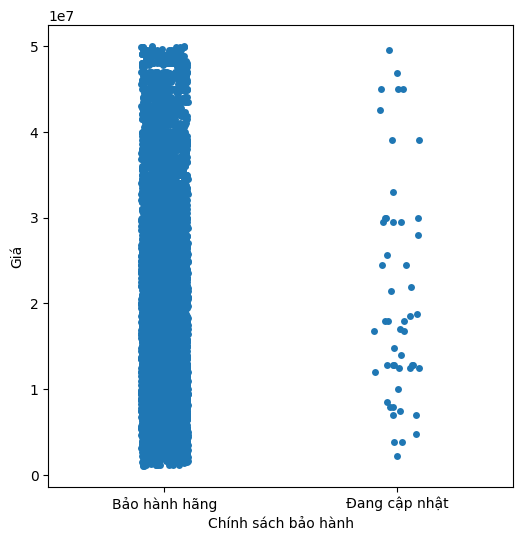

In [320]:
fig, ax = plt.subplots(figsize=(6,6))
sns.stripplot(data=data, x='Chính sách bảo hành', y='Giá', ax=ax)
plt.show()

<h2>Dữ liệu số</h2>

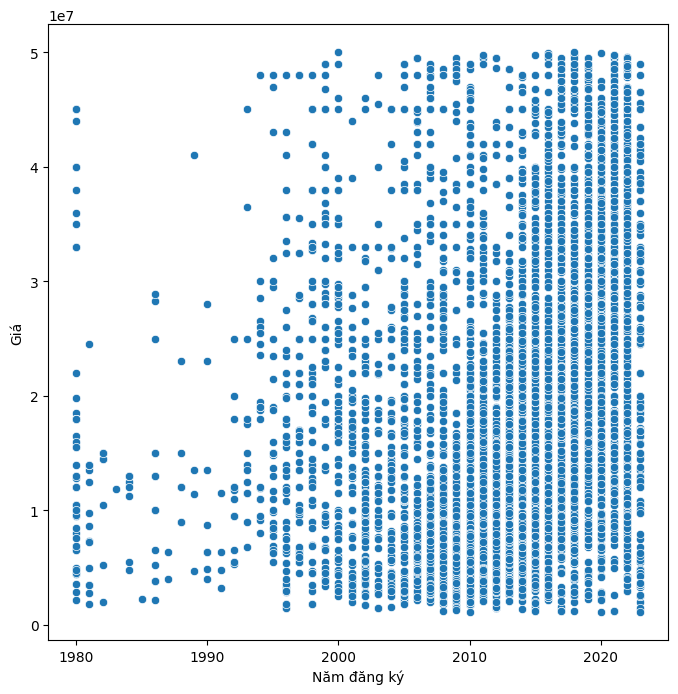

In [321]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=data, x="Năm đăng ký", y="Giá", ax=ax)
plt.show()

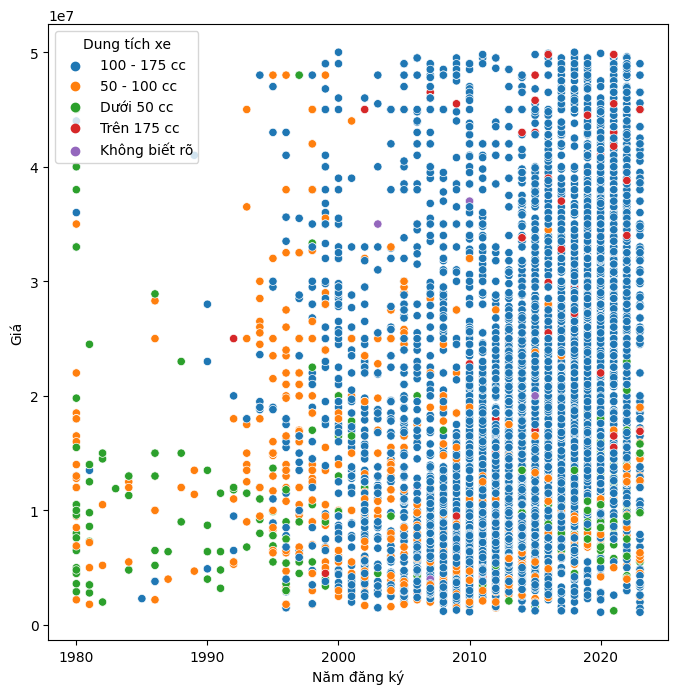

In [322]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=data, x="Năm đăng ký", y="Giá", hue='Dung tích xe', ax=ax)
plt.show()

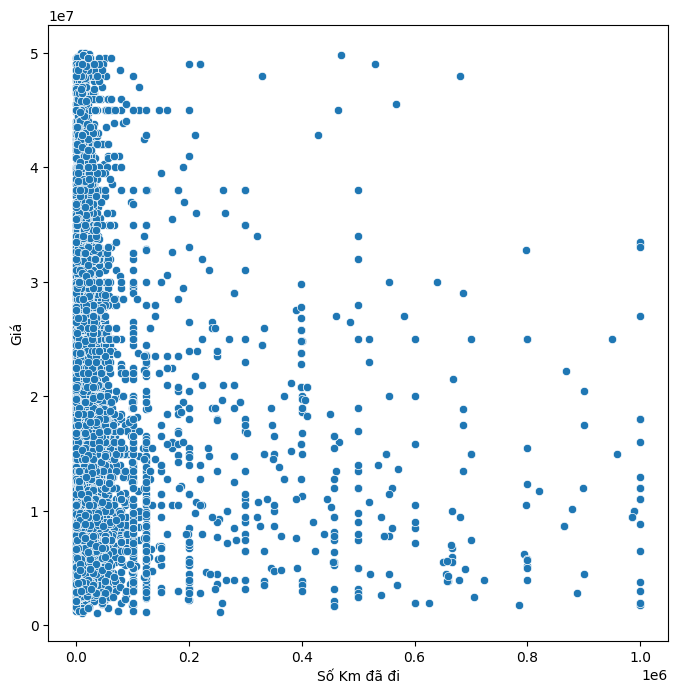

In [323]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=data, x="Số Km đã đi", y="Giá", ax=ax)
plt.show()